In [1]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

print('{0:22} {1}'.format('current direction is', os.getcwd()))
print('{0:22} {1}'.format('numpy version is', np.__version__))
print('{0:22} {1}'.format('matplotlib versiobn is', matplotlib.__version__))
print('{0:22} {1}'.format('pandas version is', pd.__version__))

current direction is   E:\workspaces\studyAI\notebook
numpy version is       1.14.3
matplotlib version is  2.2.2
pandas version is      0.23.0


In [9]:
import numpy as np


def sigmoid(z):
    """返回 sigmoid 函数计算结果

    Arguments:
        z {float | vector | matrix} -- sigmoid 函数的自变量。可以是 scalar, vector, matrix

    Return:
        {float | vector | matrix} -- sigmoid 函数的计算结果。可以是 scalar, vector, matrix
    """
    return 1 / (1 + np.exp(-z))


def hypothesis_function(theta, X):
    """计算假设函数

    Arguments:
        theta {ndarray 1D} -- theta系数 vector
        X {ndarray 2D} -- 特征数据 matrix

    Returns:
        ndarray 1D -- 假设函数计算结果
    """
    # *X.shape = (m, n) is 2D
    # *theta.shape = (n,) is 1D
    # H_theta_x.shape = (m,) is 1D
    H_theta_x = sigmoid(X.dot(theta))

    return H_theta_x

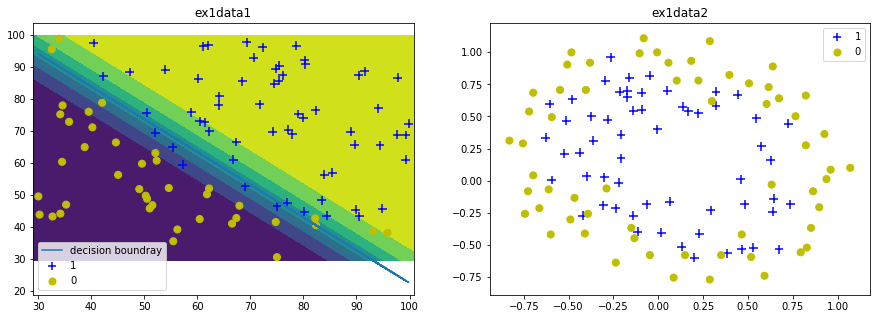

In [18]:
fig, axes = plt.subplots(1, 2, figsize=[15, 5])

#################################################################
# plot ex2data1
df = pd.read_csv('../data/andrew/ex2data1.csv', header=None)
x = df[0]
y = df[1]

### plot decision boundary with single line ###
theta_0, theta_1, theta_2 = -25.16133284, 0.2062317, 0.2014716
yy = -1 * (theta_0 + theta_1 * x) / theta_2
axes[0].plot(x, yy, label='decision boundray')

### plot decision boundray use contour ###
theta = [-25.16133284, 0.2062317, 0.2014716]
x1_min, x1_max = df[0].min() - 1, df[0].max() + 1
x2_min, x2_max = df[1].min() - 1, df[1].max() + 1

xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))

X = np.concatenate(
        (np.ones((xx1.shape[0]*xx1.shape[1], 1)),
         np.c_[xx1.ravel(), xx2.ravel()]),
    axis=1)
assert X.shape[1] == 3

h = hypothesis_function(theta, X)
assert X.shape[0] == h.shape[0]
H = h.reshape(xx1.shape)

axes[0].contourf(xx1, xx2, H)

### plot scatter ###
area = df[2]

masked_0 = np.ma.masked_where(area == 0, area) * 80
masked_1 = np.ma.masked_where(area == 1, area) + 50
axes[0].scatter(x, y, s=masked_0, marker='+', c='b', label='1')
axes[0].scatter(x, y, s=masked_1, marker='o', c='y', label='0')
axes[0].set_title('ex1data1')

axes[0].legend()

#################################################################
# plot ex2data2
df = pd.read_csv('../data/andrew/ex2data2.csv', header=None)
x = df[0]
y = df[1]
area = df[2]

masked_0 = np.ma.masked_where(area == 0, area) * 80
masked_1 = np.ma.masked_where(area == 1, area) + 50
axes[1].scatter(x, y, s=masked_0, marker='+', c='b', label='1')
axes[1].scatter(x, y, s=masked_1, marker='o', c='y', label='0')
axes[1].set_title('ex1data2')
axes[1].legend()